In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [3]:
missingdata = data.isnull().sum()

In [4]:
dropna = data.drop(missingdata[missingdata>50].index,1)

In [5]:
dropna=dropna.dropna()

In [6]:
dropna.shape

(1412, 70)

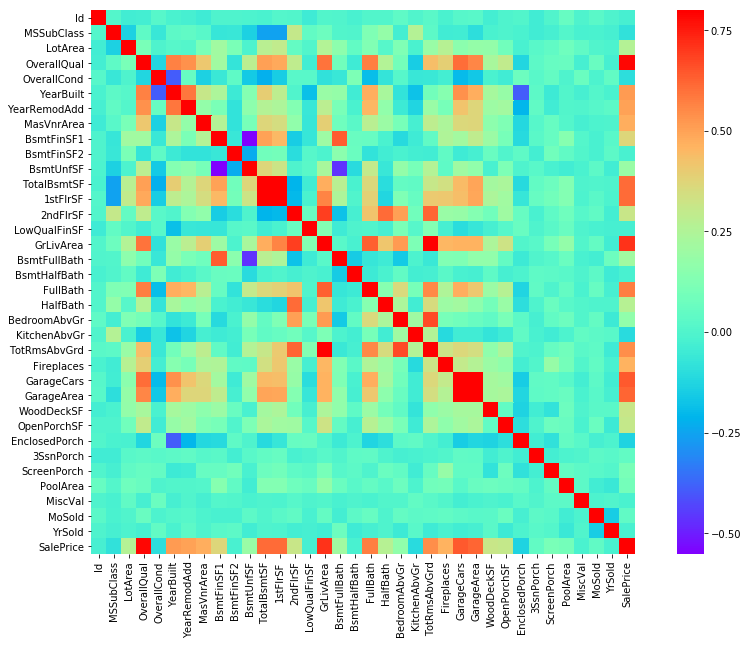

In [7]:
corrmat=dropna.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='rainbow');

In [8]:
corrsort = abs(corrmat['SalePrice'])
corrsort[corrsort<0.1]
corrsort.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.786765
GrLivArea        0.711080
GarageCars       0.641825
GarageArea       0.621095
1stFlrSF         0.614753
TotalBsmtSF      0.611084
FullBath         0.575604
TotRmsAbvGrd     0.545540
YearBuilt        0.518736
YearRemodAdd     0.500266
MasVnrArea       0.474525
Fireplaces       0.462937
BsmtFinSF1       0.368849
2ndFlrSF         0.317948
WoodDeckSF       0.317361
OpenPorchSF      0.304972
HalfBath         0.270145
LotArea          0.264803
BsmtFullBath     0.208756
BsmtUnfSF        0.188959
BedroomAbvGr     0.170174
EnclosedPorch    0.134342
ScreenPorch      0.108208
KitchenAbvGr     0.105743
OverallCond      0.093567
PoolArea         0.092776
MSSubClass       0.082281
3SsnPorch        0.047040
MoSold           0.041754
LowQualFinSF     0.028428
Id               0.024651
YrSold           0.023361
BsmtHalfBath     0.022093
BsmtFinSF2       0.020196
MiscVal          0.013287
Name: SalePrice, dtype: float64

In [9]:
fdata=dropna.drop(corrsort[corrsort<0.1].index,axis=1)

In [10]:
fdata[:10]

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2,548,Y,0,61,0,0,WD,Normal,208500
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,2,460,Y,298,0,0,0,WD,Normal,181500
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2,608,Y,0,42,0,0,WD,Normal,223500
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,3,642,Y,0,35,272,0,WD,Abnorml,140000
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,3,836,Y,192,84,0,0,WD,Normal,250000
5,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,2,480,Y,40,30,0,0,WD,Normal,143000
6,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,2,636,Y,255,57,0,0,WD,Normal,307000
7,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,2,484,Y,235,204,228,0,WD,Normal,200000
8,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,2,468,Y,90,0,205,0,WD,Abnorml,129900
9,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,1,205,Y,0,4,0,0,WD,Normal,118000


In [11]:
df_train = pd.get_dummies(fdata)

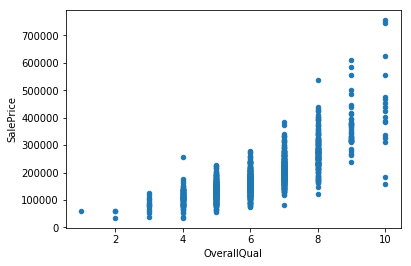

In [12]:
fdata.plot.scatter(x='OverallQual',y='SalePrice')

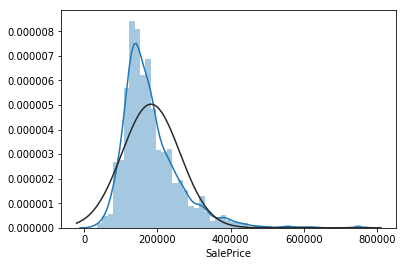

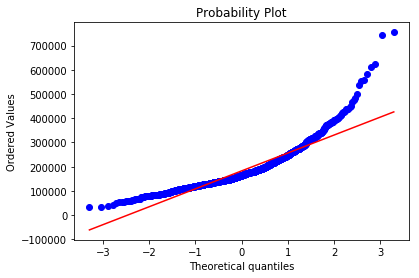

In [13]:
sns.distplot(fdata['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(fdata['SalePrice'], plot=plt)

In [14]:
fdata['SalePrice'] = np.log(fdata['SalePrice'])

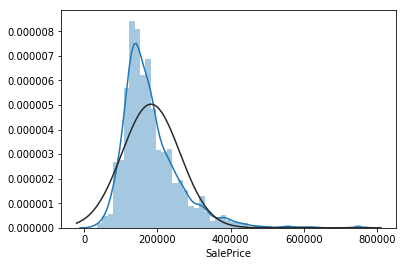

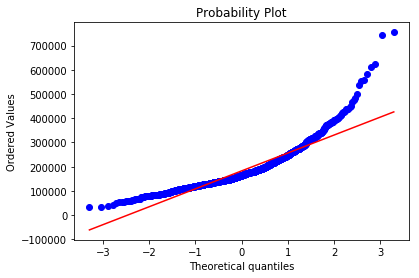

In [15]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

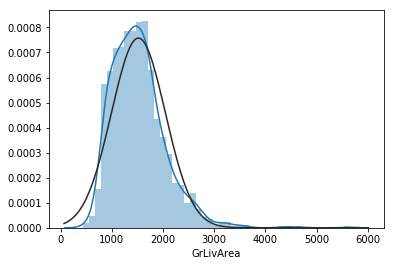

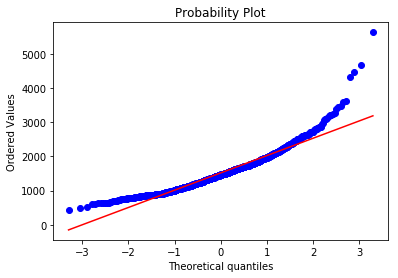

In [16]:
sns.distplot(fdata['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(fdata['GrLivArea'], plot=plt)

In [17]:
fdata['GrLivArea']= np.log(fdata['GrLivArea'])

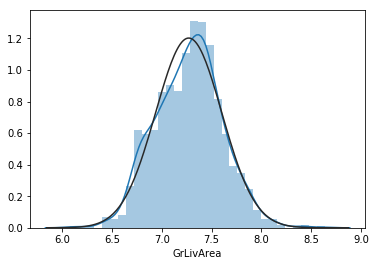

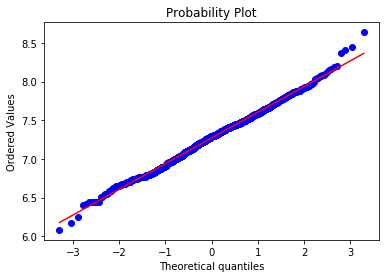

In [18]:
sns.distplot(fdata['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(fdata['GrLivArea'], plot=plt)

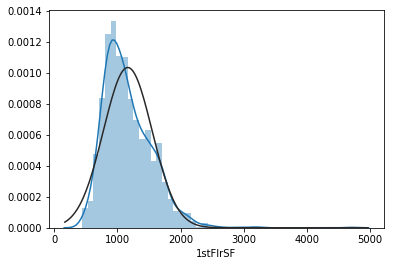

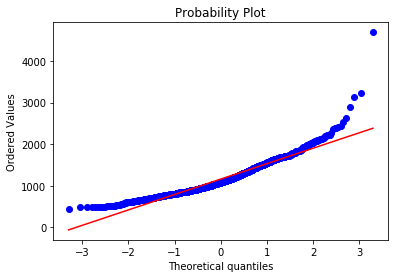

In [19]:
sns.distplot(fdata['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(fdata['1stFlrSF'], plot=plt)

In [20]:
fdata['1stFlrSF']= np.log(fdata['1stFlrSF'])

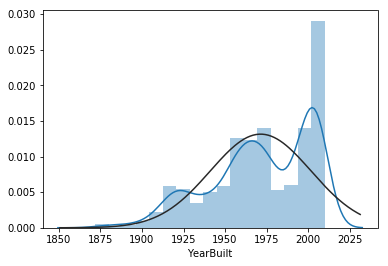

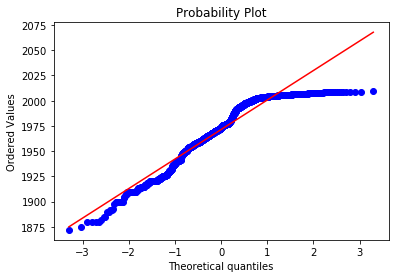

In [21]:
sns.distplot(fdata['YearBuilt'], fit=norm);
fig = plt.figure()
res = stats.probplot(fdata['YearBuilt'], plot=plt)

In [109]:
X_train = fdata.drop('SalePrice',axis=1)
X_train.shape

(1412, 58)

In [30]:
Y_train = fdata['SalePrice']

In [24]:
from sklearn import linear_model

In [25]:
reg= linear_model.LinearRegression()

In [44]:
X_train = pd.get_dummies(fdata.drop('SalePrice',axis=1))
X_train.shape


(1412, 235)

In [45]:
reg.fit(X=X_train,y=Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
reg.coef_

(235,)

In [59]:
Y_predict = X_train.dot(reg.coef_)

In [120]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y_predict,Y_train)

9.5176414167848318

In [121]:
X_test = pd.read_csv('test.csv',index_col='Id')
X_test[:10]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal


In [122]:
full_data = pd.concat([fdata,X_test],axis=0)
full_data.shape

(2871, 80)

In [123]:
full_data = full_data[fdata.drop('SalePrice',axis=1).columns]
full_data.shape

(2871, 58)

In [124]:
full_test = pd.get_dummies(full_data)
full_test = full_test[X_train.columns]
full_test.shape

KeyError: "Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',\n       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',\n       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',\n       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',\n       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',\n       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',\n       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],\n      dtype='object') not in index"

In [87]:
Y_test = reg.predict(X_test)

ValueError: shapes (1459,224) and (235,) not aligned: 224 (dim 1) != 235 (dim 0)

In [54]:
X_test.shape

(1459, 69)

# 从头开始
使用sklearn

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn import preprocessing
%matplotlib inline

In [126]:
lasso = LassoCV()

In [127]:
data = pd.read_csv('train.csv',index_col='Id')
X_Ptest = pd.read_csv('test.csv',index_col='Id')
m,n = data.shape

fulldata =pd.concat([data.drop('SalePrice',1),X_Ptest])
missingdata = fulldata.isnull().sum()
dropna = fulldata.drop(missingdata[missingdata>50].index,1)
dropna.shape

(2919, 63)

In [128]:
dropna = dropna.fillna(0)
ready_data = pd.get_dummies(dropna)
ready_data.shape

(2919, 234)

In [129]:
X_train = ready_data[:1460]

Pdata = ready_data[1460:]

In [130]:
Y_train = data['SalePrice']

In [147]:
X_strain = preprocessing.MinMaxScaler(X_train)
X_strain

MinMaxScaler(copy=True,
       feature_range=      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id
1             60     8450            7            5       2003          2003
2             20     9600            6        ...1460                     0                     1                      0

[1460 rows x 234 columns])

In [141]:
lasso.fit(X_strain,Y_train)
result = lasso.predict(Pdata)

In [142]:
result.tofile('result.csv')

In [143]:
sub = pd.Series(result,Pdata.index,)

In [144]:
sub.to_csv('sub.csv')